# Feature Engineering

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv("..\\data\\titanic\\train.csv")
test = pd.read_csv("..\\data\\titanic\\test.csv")

In [3]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [6]:
train[['Fare']]

,Fare
0,7.2500
1,71.2833
2,7.9250
3,53.1000
4,8.0500
...,...
886,13.0000
887,30.0000
888,23.4500
889,30.0000


In [7]:
survived = train [ train['Survived'] ==1 ]["Sex"].value_counts()
dead = train [ train['Survived'] ==0 ]["Sex"].value_counts()

In [8]:
survived

female    233
male      109
Name: Sex, dtype: int64

In [9]:
new_df = pd.DataFrame([survived,dead])

In [10]:
new_df

,female,male
Sex,233,109
Sex,81,468


<AxesSubplot:>

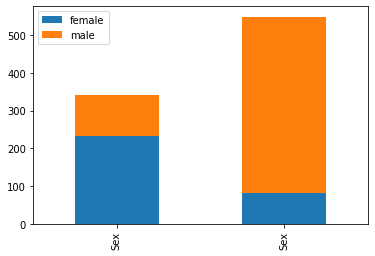

In [11]:
new_df.plot(kind="bar", stacked=True)

In [12]:
def bar(train, column):
    survived = train [ train['Survived'] ==1 ][column].value_counts()
    dead = train [ train['Survived'] ==0 ][column].value_counts()
    new_df = pd.DataFrame([survived,dead])
    new_df.index = ['3acho', 'mato']
    new_df.plot(kind="bar", stacked=True, figsize=(15,10))

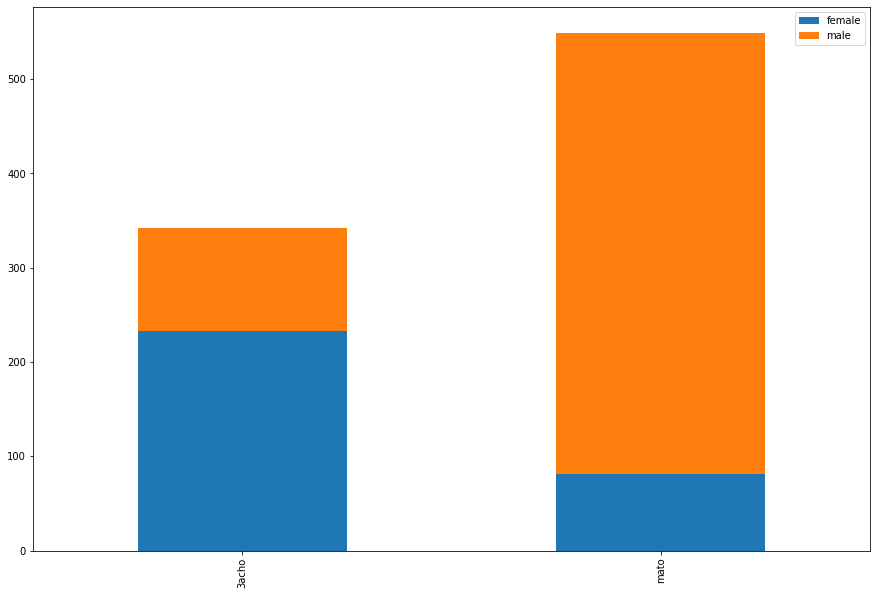

In [13]:
bar(train,"Sex")

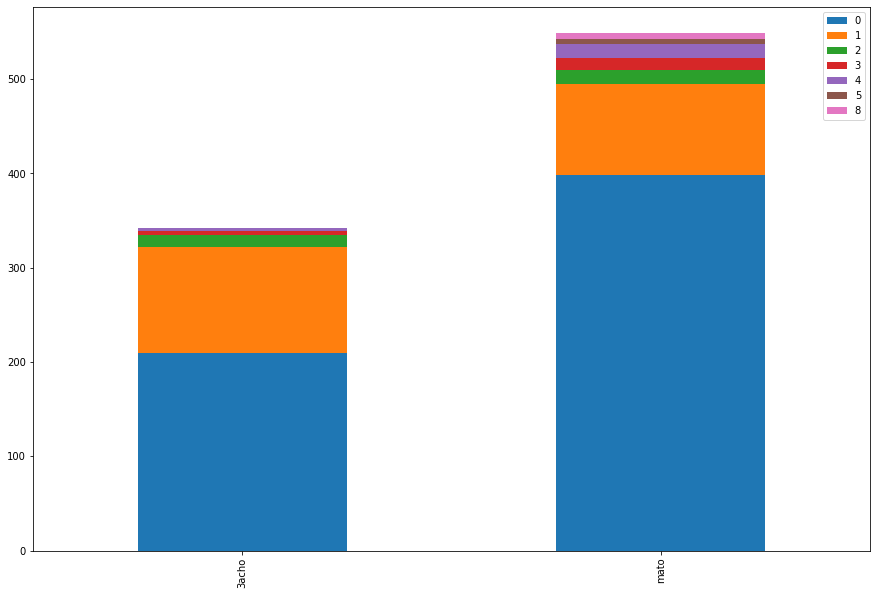

In [14]:
bar(train,"SibSp")

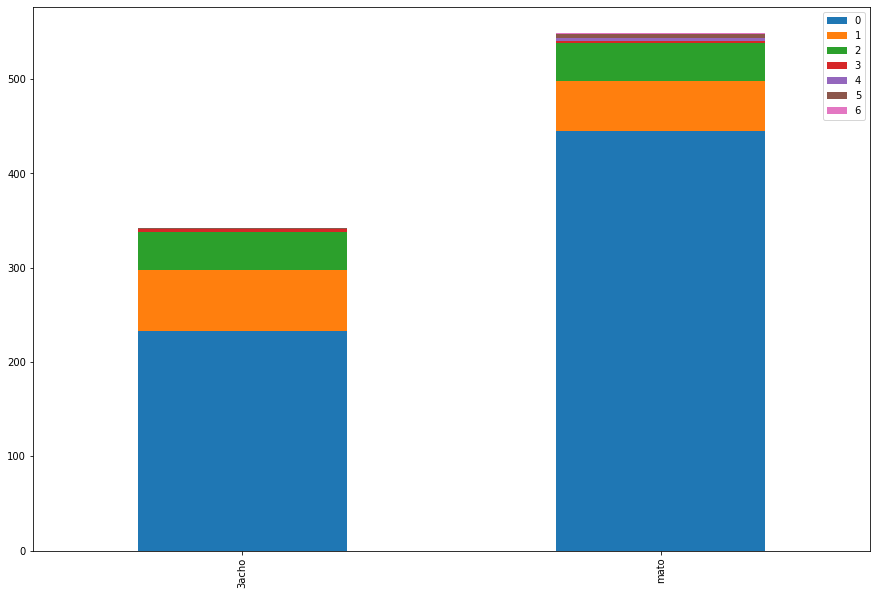

In [15]:
bar(train,"Parch")

## Cabin feature

In [16]:
train['Cabin_type'] = train["Cabin"].astype(str).str[0]
test['Cabin_type'] = test["Cabin"].astype(str).str[0]

In [17]:
train['Cabin_type'].value_counts()

n    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin_type, dtype: int64

In [18]:
train['Cabin_type'] = train['Cabin_type'].map({'A':1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7,'T':8 })
test['Cabin_type'] = test['Cabin_type'].map({'A':1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7,'T':8 })

In [19]:
train['Cabin_type']

0      NaN
1      3.0
2      NaN
3      3.0
4      NaN
      ... 
886    NaN
887    2.0
888    NaN
889    3.0
890    NaN
Name: Cabin_type, Length: 891, dtype: float64

In [20]:
train['Cabin_type'].fillna(0, inplace= True)
test['Cabin_type'].fillna(0, inplace= True)

## Name feature

In [21]:
train['Name']

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [22]:
list = [train]
for df in list:
    df['Status'] = df['Name'].str.extract('([A-Za-z]+)\.')
train["Status"]=df['Status']

In [23]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_type,Status
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0.0,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,3.0,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0.0,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,3.0,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0.0,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0.0,Rev
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,2.0,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,0.0,Miss
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,3.0,Mr


In [24]:
list = [test]
for df in list:
    df['Status'] = df['Name'].str.extract('([A-Za-z]+)\.')
test["Status"]=df['Status']

In [25]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_type,Status
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0.0,Mr
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0.0,Mrs
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0.0,Mr
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0.0,Mr
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0.0,Mrs
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,0.0,Mr
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,3.0,Dona
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0.0,Mr
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,0.0,Mr


In [26]:
train.Status.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

In [27]:
train.Status = train.Status.replace ( ['Master', 'Don', 'Rev', 'Dr', 'Major', 'Lady', 'Sir', 'Col', 'Capt', 'Countess','Jonkheer'], 'important')
test.Status = test.Status.replace ( ['Master', 'Don', 'Rev', 'Dr', 'Major', 'Lady', 'Sir', 'Col', 'Capt', 'Countess','Jonkheer'], 'important')

In [28]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_type,Status
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0.0,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,3.0,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0.0,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,3.0,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0.0,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0.0,important
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,2.0,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,0.0,Miss
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,3.0,Mr


In [29]:
train.Status = train.Status.replace ( ['Mlle', 'Ms', 'Miss', 'Mme' ], 'Miss')
train.Status = train.Status.replace ( ['Mr', 'Mrs' ], 'Mrs')
test.Status = test.Status.replace ( ['Mlle', 'Ms', 'Miss', 'Mme' ], 'Miss')
test.Status = test.Status.replace ( ['Mr', 'Mrs' ], 'Mrs')

In [30]:
train.Status.unique()

array(['Mrs', 'Miss', 'important'], dtype=object)

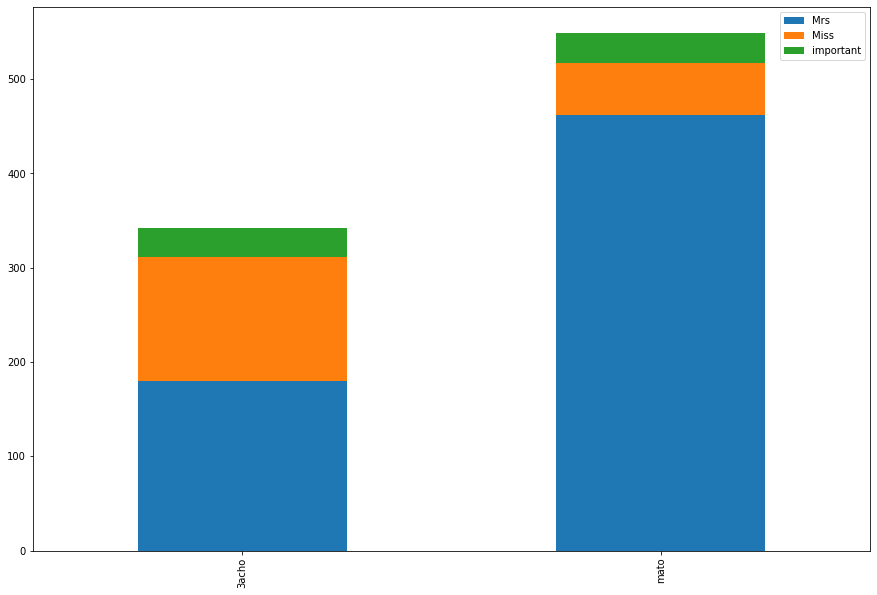

In [31]:
bar(train,'Status')

In [32]:
train['Status'] = train['Status'].map({'Mrs':1,'Miss':2,'important':3})
test['Status'] = test['Status'].map({'Mrs':1,'Miss':2,'important':3})

In [33]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  Cabin_type   891 non-null    float64
 13  Status       891 non-null    int64  
dtypes: float64(3), int64(6), object(5)
memory usage: 97.6+ KB


## Sex feature

In [34]:
train['Sex'] = train['Sex'].map({'male':0,'female':1 })
test['Sex'] = test['Sex'].map({'male':0,'female':1 })

In [35]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_type,Status
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,0.0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,3.0,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0.0,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,3.0,1
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.0000,NaN,S,0.0,3
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.0000,B42,S,2.0,2
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,NaN,1,2,W./C. 6607,23.4500,NaN,S,0.0,2
889,890,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,111369,30.0000,C148,C,3.0,1


## Family feature

In [36]:
train['family_size'] =  train['SibSp'] + train['Parch'] + 1
test['family_size'] =  test['SibSp'] + test['Parch'] + 1

In [37]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_type,Status,family_size
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,0.0,1,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,3.0,1,2
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0.0,2,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,3.0,1,2
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,0.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.0000,NaN,S,0.0,3,1
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.0000,B42,S,2.0,2,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,NaN,1,2,W./C. 6607,23.4500,NaN,S,0.0,2,4
889,890,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,111369,30.0000,C148,C,3.0,1,1


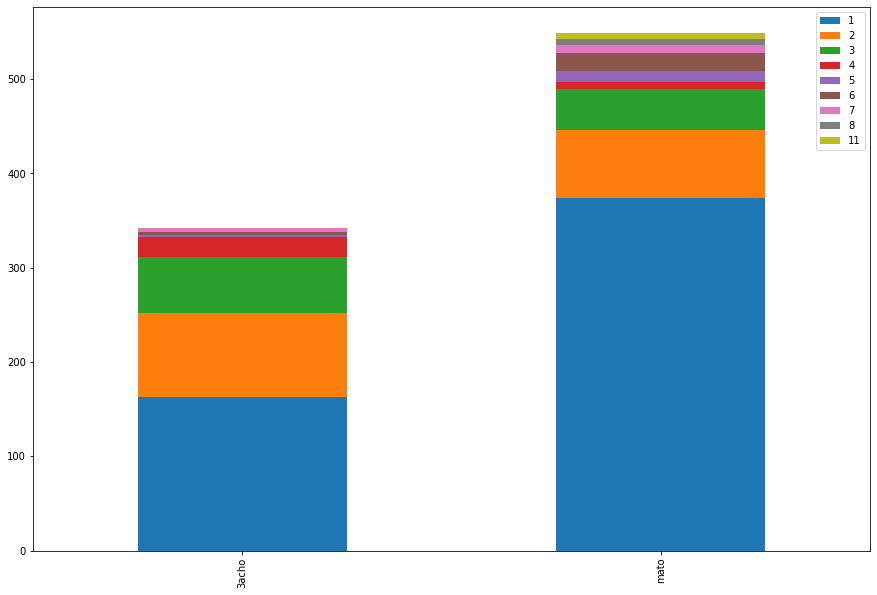

In [38]:
bar(train, 'family_size')

In [39]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_type,Status,family_size
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,0.0,1,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,3.0,1,2
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0.0,2,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,3.0,1,2
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,0.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.0000,NaN,S,0.0,3,1
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.0000,B42,S,2.0,2,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,NaN,1,2,W./C. 6607,23.4500,NaN,S,0.0,2,4
889,890,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,111369,30.0000,C148,C,3.0,1,1


In [40]:
train.drop(['Name', 'SibSp', 'SibSp', 'Ticket', 'Cabin','Embarked', 'Parch'], axis =1 , inplace=True)
test.drop(['Name', 'SibSp', 'SibSp', 'Ticket', 'Cabin','Embarked', 'Parch'], axis =1 , inplace=True)

In [41]:
train

,PassengerId,Survived,Pclass,Sex,Age,Fare,Cabin_type,Status,family_size
0,1,0,3,0,22.0,7.2500,0.0,1,2
1,2,1,1,1,38.0,71.2833,3.0,1,2
2,3,1,3,1,26.0,7.9250,0.0,2,1
3,4,1,1,1,35.0,53.1000,3.0,1,2
4,5,0,3,0,35.0,8.0500,0.0,1,1
...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,27.0,13.0000,0.0,3,1
887,888,1,1,1,19.0,30.0000,2.0,2,1
888,889,0,3,1,NaN,23.4500,0.0,2,4
889,890,1,1,0,26.0,30.0000,3.0,1,1


# Final Cleaning

In [42]:
train

,PassengerId,Survived,Pclass,Sex,Age,Fare,Cabin_type,Status,family_size
0,1,0,3,0,22.0,7.2500,0.0,1,2
1,2,1,1,1,38.0,71.2833,3.0,1,2
2,3,1,3,1,26.0,7.9250,0.0,2,1
3,4,1,1,1,35.0,53.1000,3.0,1,2
4,5,0,3,0,35.0,8.0500,0.0,1,1
...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,27.0,13.0000,0.0,3,1
887,888,1,1,1,19.0,30.0000,2.0,2,1
888,889,0,3,1,NaN,23.4500,0.0,2,4
889,890,1,1,0,26.0,30.0000,3.0,1,1


In [43]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int64  
 3   Age          332 non-null    float64
 4   Fare         417 non-null    float64
 5   Cabin_type   418 non-null    float64
 6   Status       417 non-null    float64
 7   family_size  418 non-null    int64  
dtypes: float64(4), int64(4)
memory usage: 26.2 KB


In [44]:
train.Age.fillna(train.Age.mean(), inplace=True)
test.Age.fillna(train.Age.mean(), inplace=True)

In [45]:
test.Fare.fillna(train.Fare.mean(), inplace=True)
test.Status.fillna(2, inplace=True)

In [46]:
col = ["Age", "family_size","Pclass","Sex","Cabin_type","Status","Fare"]
train_X = train[col]
train_X

,Age,family_size,Pclass,Sex,Cabin_type,Status,Fare
0,22.000000,2,3,0,0.0,1,7.2500
1,38.000000,2,1,1,3.0,1,71.2833
2,26.000000,1,3,1,0.0,2,7.9250
3,35.000000,2,1,1,3.0,1,53.1000
4,35.000000,1,3,0,0.0,1,8.0500
...,...,...,...,...,...,...,...
886,27.000000,1,2,0,0.0,3,13.0000
887,19.000000,1,1,1,2.0,2,30.0000
888,29.699118,4,3,1,0.0,2,23.4500
889,26.000000,1,1,0,3.0,1,30.0000


In [47]:
train_y = train["Survived"]
train_y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

# Logstic Regression

In [48]:
from sklearn.linear_model import LogisticRegression

LR_classification = LogisticRegression()

In [49]:
LR_classification.fit(train_X,train_y)

LogisticRegression()

In [50]:
Predictions = LR_classification.predict(train_X)

In [51]:
type(Predictions)

numpy.ndarray

In [52]:
type(np.array(train_y))

numpy.ndarray

In [53]:
print("the accuracy of the model is: {:.2f}%".format(LR_classification.score(train_X,train_y)*100))

the accuracy of the model is: 80.81%


# Decision Tree

In [54]:
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier()

In [55]:
DT.fit(train_X,train_y)

DecisionTreeClassifier()

In [56]:
Predictions = DT.predict(train_X)

In [57]:
Predictions

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,

In [58]:
print("the accuracy of the model is: {:.2f}%".format(DT.score(train_X,train_y)*100))

the accuracy of the model is: 98.77%


# Abstraction

In [59]:
def model_training(models):
    for element in models:
        model = models[element]
        model.fit(train_X,train_y)
        print("the accuracy of "+element+" is: {:.2f}%".format(model.score(train_X,train_y)*100))

In [60]:
our_models = {"Logistic Regression":LogisticRegression(), "Decision Tree":DecisionTreeClassifier()}

In [61]:
model_training(our_models)

the accuracy of Logistic Regression is: 80.81%
the accuracy of Decision Tree is: 98.77%


# Mooooore MODELS!!!

In [62]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn import svm


import warnings
warnings.filterwarnings("ignore")
xgb.set_config(verbosity=0)

In [63]:
our_models = {"Logistic Regression":LogisticRegression(), "Decision Tree":DecisionTreeClassifier(), "Nearest Neighbors": KNeighborsClassifier(), "Random Forest":RandomForestClassifier(), "XGBClassifier": xgb.XGBClassifier(), "SVM":svm.SVC()}

In [64]:
model_training(our_models)

the accuracy of Logistic Regression is: 80.81%
the accuracy of Decision Tree is: 98.77%
the accuracy of Nearest Neighbors is: 81.03%
the accuracy of Random Forest is: 98.77%
the accuracy of XGBClassifier is: 96.52%
the accuracy of SVM is: 68.35%


# Competition Submission

In [65]:
rf = RandomForestClassifier()
LR = LogisticRegression()
rf.fit(train_X,train_y)
print("the accuracy of Random Forest is: {:.2f}%".format(rf.score(train_X,train_y)*100))

the accuracy of Random Forest is: 98.77%


In [66]:
col = ["Age", "family_size","Pclass","Sex","Cabin_type","Status","Fare"]
test_X = test[col]
test_X

,Age,family_size,Pclass,Sex,Cabin_type,Status,Fare
0,34.500000,1,3,0,0.0,1.0,7.8292
1,47.000000,2,3,1,0.0,1.0,7.0000
2,62.000000,1,2,0,0.0,1.0,9.6875
3,27.000000,1,3,0,0.0,1.0,8.6625
4,22.000000,3,3,1,0.0,1.0,12.2875
...,...,...,...,...,...,...,...
413,29.699118,1,3,0,0.0,1.0,8.0500
414,39.000000,1,1,1,3.0,2.0,108.9000
415,38.500000,1,3,0,0.0,1.0,7.2500
416,29.699118,1,3,0,0.0,1.0,8.0500


In [67]:
Predictions = rf.predict(test_X)

In [68]:
# Submission
output= pd.DataFrame({"PassengerId": test["PassengerId"], "Survived": Predictions})

In [69]:
output

,PassengerId,Survived
0,892,0
1,893,0
2,894,1
3,895,1
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [70]:
output.to_csv("Submission.csv", index=False)